# Previsão de Votação de Deputados
Modelos preditivos de regressão utilizando a biblioteca scikit learn para a predição 
dos votos de deputados federais considerando dados das eleições de 2006 e 2010

Tutorial utilizado para o pré processamento de dados: https://www.kaggle.com/apapiu/regularized-linear-models

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## Importando dados do arquivo e visualizando as 3 primeiras linhas

In [2]:
eleicoes = pd.read_csv('/home/lsp/dados/am/eleicoes_2006_a_2010.csv')
eleicoes[:3]

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,votos
0,2006,10001,JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6,6,16600.0,2766.666667,NaN,...,14,14,16583.60,1184.542857,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,8579
1,2006,10002,LOIVA DE OLIVEIRA,RO,PT,13,13,22826.0,1755.846154,6625.0,...,24,23,20325.99,883.738696,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,2757
2,2006,10002,MARIA DALVA DE SOUZA FIGUEIREDO,AP,PT,17,16,148120.8,9257.550000,2250.0,...,123,108,146011.70,1351.960185,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO,17428


## A partir do livro Análise Multivariada de Dados (Hair, Black, Babin, Anderson e Tathan) 6ª edição, existem 6 etapas para a construção de modelos multivariados:
- 1 Definição do problema
- 2 Definição do plano de análise
- 3 Avaliação das suposições
- 4 Estimação do modelo
- 5 Interpretação da variáveis
- 6 Validação

O objetivo de trazer essas etapas é pensar em como elas são abordados nesse caso prático de regressão.

**Até agora é possível identificar as estpas 1 e 2:** 
- 1 Definição do problema: Predição da quantidade de votos de um candidato a deputado com base em algumas informações da campanha.
- 2 Definição do plano de análise:
    - Análise dos dados
    - Correções e transformações necessárias
    - Identificar quais atributos são mais relevantes?
    - Descrever suposições a partir da etapa anterior?

## Observando os dados

In [3]:
eleicoes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ano,7330.0,2.008151e+03,1.994416e+00,2006.00,2006.000000,2.010000e+03,2.010000e+03,2.010000e+03
sequencial_candidato,7330.0,9.179127e+10,9.924629e+10,10001.00,10565.000000,5.000000e+10,1.900000e+11,2.700000e+11
quantidade_doacoes,7330.0,2.831010e+01,1.186551e+02,1.00,4.000000,9.000000e+00,2.400000e+01,6.997000e+03
quantidade_doadores,7330.0,2.581746e+01,1.036594e+02,1.00,4.000000,8.000000e+00,2.200000e+01,5.800000e+03
total_receita,7169.0,1.544899e+05,3.953880e+05,0.00,2700.000000,1.209578e+04,8.929956e+04,4.539727e+06
media_receita,7169.0,5.485598e+03,1.411653e+04,0.00,622.857143,1.540543e+03,4.662500e+03,5.001800e+05
recursos_de_outros_candidatos/comites,4940.0,3.002116e+04,1.280932e+05,2.41,1180.000000,3.522570e+03,1.327550e+04,3.664205e+06
recursos_de_pessoas_fisicas,4647.0,3.730931e+04,8.215398e+04,0.03,2000.000000,9.000000e+03,3.756234e+04,1.403049e+06
recursos_de_pessoas_juridicas,3354.0,1.761195e+05,3.517541e+05,0.00,3422.500000,2.612000e+04,1.755218e+05,3.178226e+06
recursos_proprios,4942.0,3.914169e+04,1.839980e+05,0.00,1177.232500,5.000000e+03,2.027459e+04,5.525600e+06


Atributos numéricos:
quantidade_doacoes	
- quantidade_doadores	
- total_receita	
- media_receita	
- recursos_de_outros_candidatos/comites	
- recursos_de_pessoas_fisicas	
- recursos_de_pessoas_juridicas	
- recursos_proprios	
- quantidade_despesas	
- quantidade_fornecedores	
- total_despesa	
- media_despesa		
- votos

Atributos categórigos:
- ano	
- sequencial_candidato	
- nome	
- uf	
- partido	
- cargo	
- sexo	
- grau	
- estado_civil	
- ocupacao	

**Como saber quais variáveis normalizar e quais variáveis utilizar em um modelo?**


## Distribuição das variáveis 

### Ao observar a sitruibuição do atributo total_receita podemos obeservar que ele está enviesado para a direta. Para resolver, utilizamos a transformação logarítmica.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c2cf5a4a8>]], dtype=object)

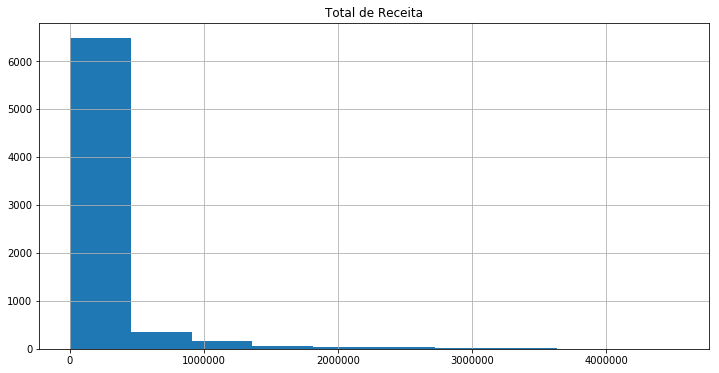

In [4]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
var = pd.DataFrame({"Total de Receita":eleicoes['total_receita']})

var.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c2cf5a438>]], dtype=object)

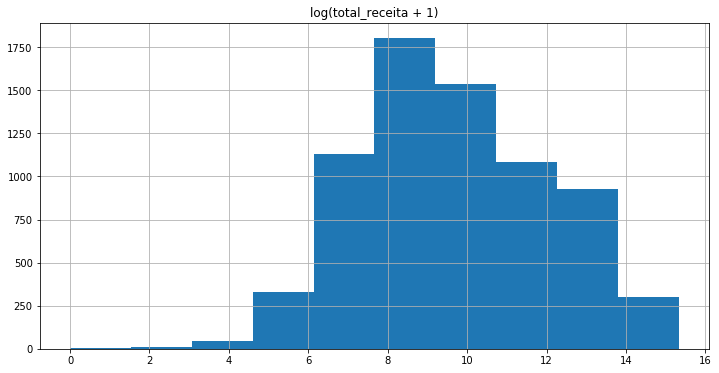

In [5]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
var = pd.DataFrame({"log(total_receita + 1)":np.log1p(eleicoes['total_receita'])})

var.hist()

### Também é possível observar um enviesamento no atributo votos

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c24f50a20>]], dtype=object)

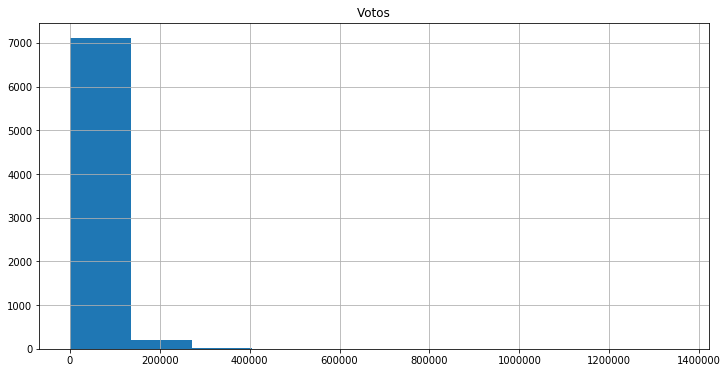

In [6]:
var = pd.DataFrame({"Votos":eleicoes['votos']})

var.hist()

### E para lidar com isso vamos fazer a mesma transformação anterior. Vamos replicar essa transformação para todas as outras variáveis numéricas do conjunto de dados.

## Transformando variáveis numéricas

Selecionando as variáveis numéricas

In [7]:
numeric_features = eleicoes.dtypes[eleicoes.dtypes != "object"].index
eleicoes[numeric_features][:5]

,ano,sequencial_candidato,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,votos
0,2006,10001,6,6,16600.00,2766.666667,NaN,9000.0,6300.00,1300.0,14,14,16583.60,1184.542857,8579
1,2006,10002,13,13,22826.00,1755.846154,6625.0,15000.0,1000.00,201.0,24,23,20325.99,883.738696,2757
2,2006,10002,17,16,148120.80,9257.550000,2250.0,34150.0,62220.80,59500.0,123,108,146011.70,1351.960185,17428
3,2006,10002,6,6,3001.12,500.186667,NaN,1150.0,1101.12,750.0,8,8,3001.12,375.140000,1193
4,2006,10003,48,48,NaN,NaN,NaN,50878.0,NaN,68942.0,133,120,116416.64,970.138667,29401


Verificando o viés das variáveis numéricas

In [8]:
skewed_features = eleicoes[numeric_features].apply(lambda x: x.dropna().skew())
skewed_features

ano                                      -0.151624
sequencial_candidato                      0.447496
quantidade_doacoes                       39.982260
quantidade_doadores                      37.541762
total_receita                             4.599988
media_receita                            12.105833
recursos_de_outros_candidatos/comites    13.892631
recursos_de_pessoas_fisicas               6.800271
recursos_de_pessoas_juridicas             3.431190
recursos_proprios                        15.782559
quantidade_despesas                       8.546077
quantidade_fornecedores                   8.424869
total_despesa                             4.534959
media_despesa                            66.379222
votos                                     6.669571
dtype: float64

Selecionando os atributos com viés acima de 0.75

In [9]:
skewed_features = skewed_features[skewed_features > 0.75]
skewed_features

quantidade_doacoes                       39.982260
quantidade_doadores                      37.541762
total_receita                             4.599988
media_receita                            12.105833
recursos_de_outros_candidatos/comites    13.892631
recursos_de_pessoas_fisicas               6.800271
recursos_de_pessoas_juridicas             3.431190
recursos_proprios                        15.782559
quantidade_despesas                       8.546077
quantidade_fornecedores                   8.424869
total_despesa                             4.534959
media_despesa                            66.379222
votos                                     6.669571
dtype: float64

Aplicando transformação logarítmica em todos os dados selecionados em skewed_features

In [10]:
skewed_features = skewed_features.index

eleicoes[skewed_features] = np.log1p(eleicoes[skewed_features])
eleicoes[numeric_features][:5]

,ano,sequencial_candidato,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,votos
0,2006,10001,1.945910,1.945910,9.717218,7.925760,NaN,9.105091,8.748464,7.170888,2.708050,2.708050,9.716230,7.077956,9.057189
1,2006,10002,2.639057,2.639057,10.035699,7.471276,8.798757,9.615872,6.908755,5.308268,3.218876,3.178054,9.919705,6.785292,7.922261
2,2006,10002,2.890372,2.833213,11.905790,9.133303,7.719130,10.438547,11.038461,10.993748,4.820282,4.691348,11.891449,7.210050,9.765891
3,2006,10002,1.945910,1.945910,8.007074,6.216979,NaN,7.048386,7.004991,6.621406,2.197225,2.197225,8.007074,5.929961,7.085064
4,2006,10003,3.891820,3.891820,NaN,NaN,NaN,10.837206,NaN,11.141035,4.897840,4.795791,11.664939,6.878469,10.288818


## Transformando variáveis categóricas

Verificando a quantidade de linhas e colunas do DataFrame antes da tranformação das variáveis categóricas

In [11]:
eleicoes.shape

(7330, 23)

Convertendo atributos categóricos em valores modelo

In [12]:
eleicoes = pd.get_dummies(eleicoes)
eleicoes.shape

(7330, 7038)

A quantidade de colunas cresce bastante

## Transformando atributos com valores NaN: 
Opção 1 - Preencher os valores NA's com a média de valores de cada coluna

In [13]:
eleicoes_mean = eleicoes.fillna(eleicoes.mean())
eleicoes_mean[:5]

,ano,sequencial_candidato,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,...,"ocupacao_TÉCNICO DE OBRAS CIVIS, ESTRADAS, SANEAMENTO E ASSEMELHADOS",ocupacao_TÉCNICO EM AGRONOMIA E AGRIMENSURA,ocupacao_TÉCNICO EM EDIFICAÇÕES,ocupacao_TÉCNICO EM INFORMÁTICA,ocupacao_VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,"ocupacao_VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIAJANTE E ASSEMELHADOS",ocupacao_VEREADOR,ocupacao_VETERINÁRIO,ocupacao_VIGILANTE,ocupacao_ZOOTECNISTA
0,2006,10001,1.945910,1.945910,9.717218,7.925760,8.324939,9.105091,8.748464,7.170888,...,0,0,0,0,0,0,1,0,0,0
1,2006,10002,2.639057,2.639057,10.035699,7.471276,8.798757,9.615872,6.908755,5.308268,...,0,0,0,0,0,0,0,0,0,0
2,2006,10002,2.890372,2.833213,11.905790,9.133303,7.719130,10.438547,11.038461,10.993748,...,0,0,0,0,0,0,0,0,0,0
3,2006,10002,1.945910,1.945910,8.007074,6.216979,8.324939,7.048386,7.004991,6.621406,...,0,0,0,0,0,0,0,0,0,0
4,2006,10003,3.891820,3.891820,9.634619,7.466020,8.324939,10.837206,10.011960,11.141035,...,0,0,0,0,0,0,0,0,0,0


Opção 2 - Preencher valores NaN com 0

In [14]:
eleicoes_zero = eleicoes.fillna(0)
eleicoes_zero[:5]

,ano,sequencial_candidato,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,...,"ocupacao_TÉCNICO DE OBRAS CIVIS, ESTRADAS, SANEAMENTO E ASSEMELHADOS",ocupacao_TÉCNICO EM AGRONOMIA E AGRIMENSURA,ocupacao_TÉCNICO EM EDIFICAÇÕES,ocupacao_TÉCNICO EM INFORMÁTICA,ocupacao_VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,"ocupacao_VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIAJANTE E ASSEMELHADOS",ocupacao_VEREADOR,ocupacao_VETERINÁRIO,ocupacao_VIGILANTE,ocupacao_ZOOTECNISTA
0,2006,10001,1.945910,1.945910,9.717218,7.925760,0.000000,9.105091,8.748464,7.170888,...,0,0,0,0,0,0,1,0,0,0
1,2006,10002,2.639057,2.639057,10.035699,7.471276,8.798757,9.615872,6.908755,5.308268,...,0,0,0,0,0,0,0,0,0,0
2,2006,10002,2.890372,2.833213,11.905790,9.133303,7.719130,10.438547,11.038461,10.993748,...,0,0,0,0,0,0,0,0,0,0
3,2006,10002,1.945910,1.945910,8.007074,6.216979,0.000000,7.048386,7.004991,6.621406,...,0,0,0,0,0,0,0,0,0,0
4,2006,10003,3.891820,3.891820,0.000000,0.000000,0.000000,10.837206,0.000000,11.141035,...,0,0,0,0,0,0,0,0,0,0


## Separando dados
Vamos utilizar os dados de 2006 para compor o conjunto de treino e 2010 para o conjunto de teste. 
E utilizar para a transformação dos valores NaN a opção 1 que preenche os valores NA's com a média de valores de cada coluna.

**todo:** Retirar número sequencial do candidato visto que é apenas um atributo de identificação

In [15]:
eleicoes = eleicoes_mean
train = eleicoes[(eleicoes.ano==2006)]
test = eleicoes[(eleicoes.ano==2010)]

## Criando matrizes para o sklearn

In [16]:
x_train = train.drop('votos', axis=1)
y_train = train['votos']

x_test = test.drop('votos', axis=1)
y_test = test['votos']

## Regressão sem regularização

Importando módulos necessários

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, median_absolute_error

Treinando o modelo com os dados de treino

In [18]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Predizendo os valores de y para dos conjunto de teste

In [19]:
y_pred = reg.predict(x_test)
y_pred

array([  -41426.41041016,   -41426.92336961,   -41429.46939879, ...,
       -1118767.74416945, -1118767.88837685, -1118766.65315008])

#### Calculando métricas para avaliação do modelo

Coeficientes calculados para os atributos

In [32]:
reg.coef_

array([ -6.82653788e-02,  -4.14360770e-06,  -2.80207302e-01, ...,
         3.56831830e-01,   7.26777657e-02,  -5.29442885e-02])

**MSE** - Média do quadrado do erro

In [39]:
mse = mean_squared_error(y_test, y_pred)
mse

583419247844.15625

**RMSE** - Raiz da média do erro quadrado

In [42]:
np.sqrt(mse)

763818.85800506151

R² calculado de duas formas:
- A partir da função de `score` contida no módulo `LinearRegression` 
- E a partir da função `r2_score` contida no módulo `sklearn.metrics`

Para usar a `score` do `LinearRegression`  é preciso passar o x_teste para que antes de calcular o r² ele calcule o valor previsto (y_pred) pelo modelo a partir desse conjunto de dados (x_test), enquanto no `r2_score` já devemos passar os valores previstos. Olhando o código fonte, por dentro o `score` usa o `r2_score`

In [34]:
reg.score(x_test, y_test)

-141571723633.73026

In [35]:
r2_score(y_test, y_pred)

-141571723633.73026

In [46]:
explained_variance_score(y_test, y_pred)

-20196480077.026867

## Regressão com Ridge e Lasso

In [43]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

Função para calcular o RMSE do modelo passado como parâmentro

In [44]:
def calc_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv=5))
    return rmse

## Ridge

In [45]:
model_ridge = Ridge()

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
ridge = [calc_rmse(Ridge(alpha= alpha)).mean() 
            for alpha in alphas]

ridge

[0.95861448855858689,
 0.95767511108504666,
 0.95631826119644336,
 0.95394832119686068,
 0.9508565319561294,
 0.94965474372399239,
 0.9492804595618598,
 0.95025956374759313,
 0.95497486120767461,
 0.96122108027518716,
 0.96764967044874051]

Text(0,0.5,'rmse')

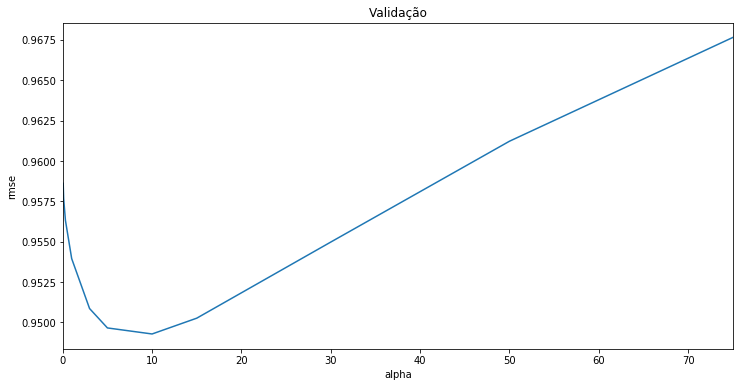

In [47]:
ridge = pd.Series(ridge, index=alphas)
ridge.plot(title = "Validação")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [48]:
ridge.min()

0.9492804595618598

## Lasso

In [49]:
model_lasso = LassoCV(alphas=[1, 0.1, 0.001, 0.005]).fit(x_train, y_train)

calc_rmse(model_lasso)

/home/lsp/anaconda2/envs/notebookEnv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/lsp/anaconda2/envs/notebookEnv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/lsp/anaconda2/envs/notebookEnv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/lsp/anaconda2/envs/notebookEnv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_

array([ 1.02006985,  0.96965926,  0.93995828,  0.94175749,  0.94534735])

In [50]:
coeficientes = pd.Series(model_lasso.coef_, index = x_train.columns)
print("Lasso selecionou " + str(sum(coeficientes != 0)) + " variáveis e rejeitou " + 
      str(sum(coeficientes == 0)) + " variáveis")

Lasso selecionou 114 variáveis e rejeitou 6923 variáveis


In [51]:
descricao_coeficientes = pd.concat([coeficientes.sort_values().head(10),
                                   coeficientes.sort_values().tail(10)])

descricao_coeficientes

uf_RR                             -1.033189
uf_TO                             -0.882280
uf_DF                             -0.881074
uf_AP                             -0.837263
nome_MAURO DE OLIVEIRA CARVALHO   -0.803587
uf_AC                             -0.532937
ocupacao_FISCAL                   -0.517047
uf_MS                             -0.475047
uf_MT                             -0.428219
total_despesa                     -0.350571
ocupacao_MÉDICO                    0.466671
quantidade_doadores                0.513036
uf_CE                              0.515153
uf_SE                              0.525419
ocupacao_CANTOR E COMPOSITOR       0.527445
ocupacao_DEPUTADO                  0.595299
media_despesa                      0.623502
quantidade_fornecedores            0.748381
nome_ENEAS FERREIRA CARNEIRO       1.453533
nome_CLODOVIL HERNANDES            1.674419
dtype: float64

Text(0.5,1,'Resumo de coeficientes considerados')

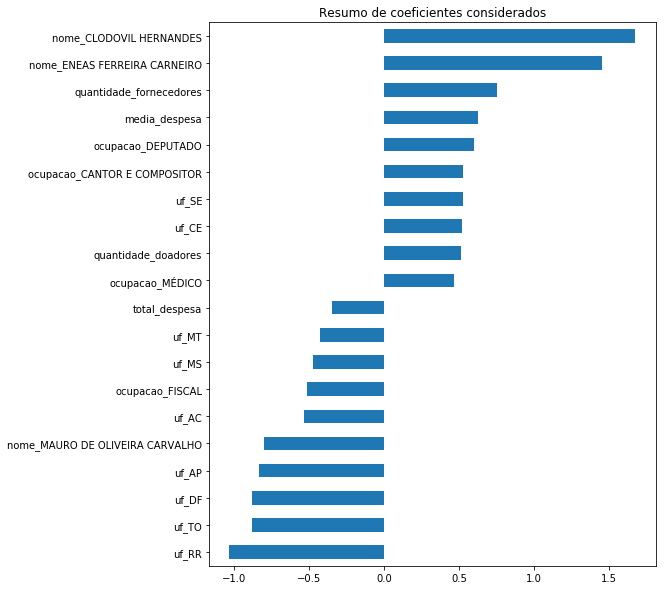

In [52]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
descricao_coeficientes.plot(kind= 'barh')
plt.title("Resumo de coeficientes considerados")

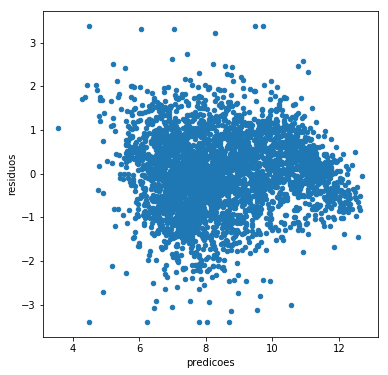

In [53]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

predicoes = pd.DataFrame({"predicoes":model_lasso.predict(x_train), "true":y_train})
predicoes["residuos"] = predicoes["true"] - predicoes["predicoes"]
predicoes.plot(x = "predicoes", y = "residuos",kind = "scatter")

## Regressão não paramétrica como KNN

## Regressão não paramétrica como KNN

## Árvores de Regressão

## Otimizando hiperâmetros

### RMSE de validação cruzada para

### RMSE de validação cruzada para

### RMSE de validação cruzada para

### RMSE de validação cruzada para

## Resíduos x Predições

## Retreino com 2006 e 2010

## Dentre os modelos avaliados, qual foi o que deu o melhor resultado nos dados de 2014 em termos de RMSE? 